# Car Price Prediction

<h2>Importing Libraries and Dataset</h2><a id="1"></a>

In [338]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <h2>Exploratory Data Analysis</h2><a id="2"></a>

In [339]:
# Loading Dataset
df = pd.read_csv('car data.csv')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [341]:
df.shape

(301, 9)

- 'Selling_Price' is our Target variable.

In [342]:
# Descriptive statistical summary of numerical features
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [343]:
# Descriptive statistical summary of categorical features
df.describe(include= 'object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [377]:
# To find total_missing_values in different columns of data and their percentage
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [378]:
missing_data(data= df)

,Total,Percent
Car_Name,0,0.0
Year,0,0.0
Selling_Price,0,0.0
Present_Price,0,0.0
Kms_Driven,0,0.0
Fuel_Type,0,0.0
Seller_Type,0,0.0
Transmission,0,0.0
Owner,0,0.0
Current_Year,0,0.0


As from above dataframe, my observation on missing data are: 
<UL>
   <li>There is no missing values in our dataset.
   <li>Therefore there is no need of data cleaning.
</UL>

In [346]:
print("'Fuel_Type' variable have {} unique category : {}\n".format(df['Fuel_Type'].nunique(), df['Fuel_Type'].unique()))
print("'Seller_Type' variable have {} unique category : {}\n".format(df['Seller_Type'].nunique(), \
                                                                     df['Seller_Type'].unique()))
print("'Transmission' variable have {} unique category : {}\n".format(df['Transmission'].nunique(), \
                                                                    df['Transmission'].unique()))
print("'Owner' variable have {} unique category : {}".format(df['Owner'].nunique(), df['Owner'].unique()))

'Fuel_Type' variable have 3 unique category : ['Petrol' 'Diesel' 'CNG']

'Seller_Type' variable have 2 unique category : ['Dealer' 'Individual']

'Transmission' variable have 2 unique category : ['Manual' 'Automatic']

'Owner' variable have 3 unique category : [0 1 3]


In [347]:
df['Owner'].replace(to_replace=3, value=2, inplace= True)
print("'Owner' variable have {} unique category : {}".format(df['Owner'].nunique(), df['Owner'].unique()))

'Owner' variable have 3 unique category : [0 1 2]


<h3>Feature Engineering</h3><a id="3"></a>


In [348]:
# Let's see all column names
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [349]:
# Let's create a new variable 'Current_Year'
df['Current_Year'] = 2024

# To Calculate how old the car is, I created new feature "No_of_Years"
df['No_of_Years'] = df['Current_Year'] - df['Year']

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


#### Remove features

In [350]:
final_df = df.copy()            # Creating copy of created dataframe
final_df.drop(labels= ['Car_Name','Year', 'Current_Year'], axis= 1, inplace= True)          #droping unnecessary features

final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


<h2>Data Visualization</h2><a id="4"></a>

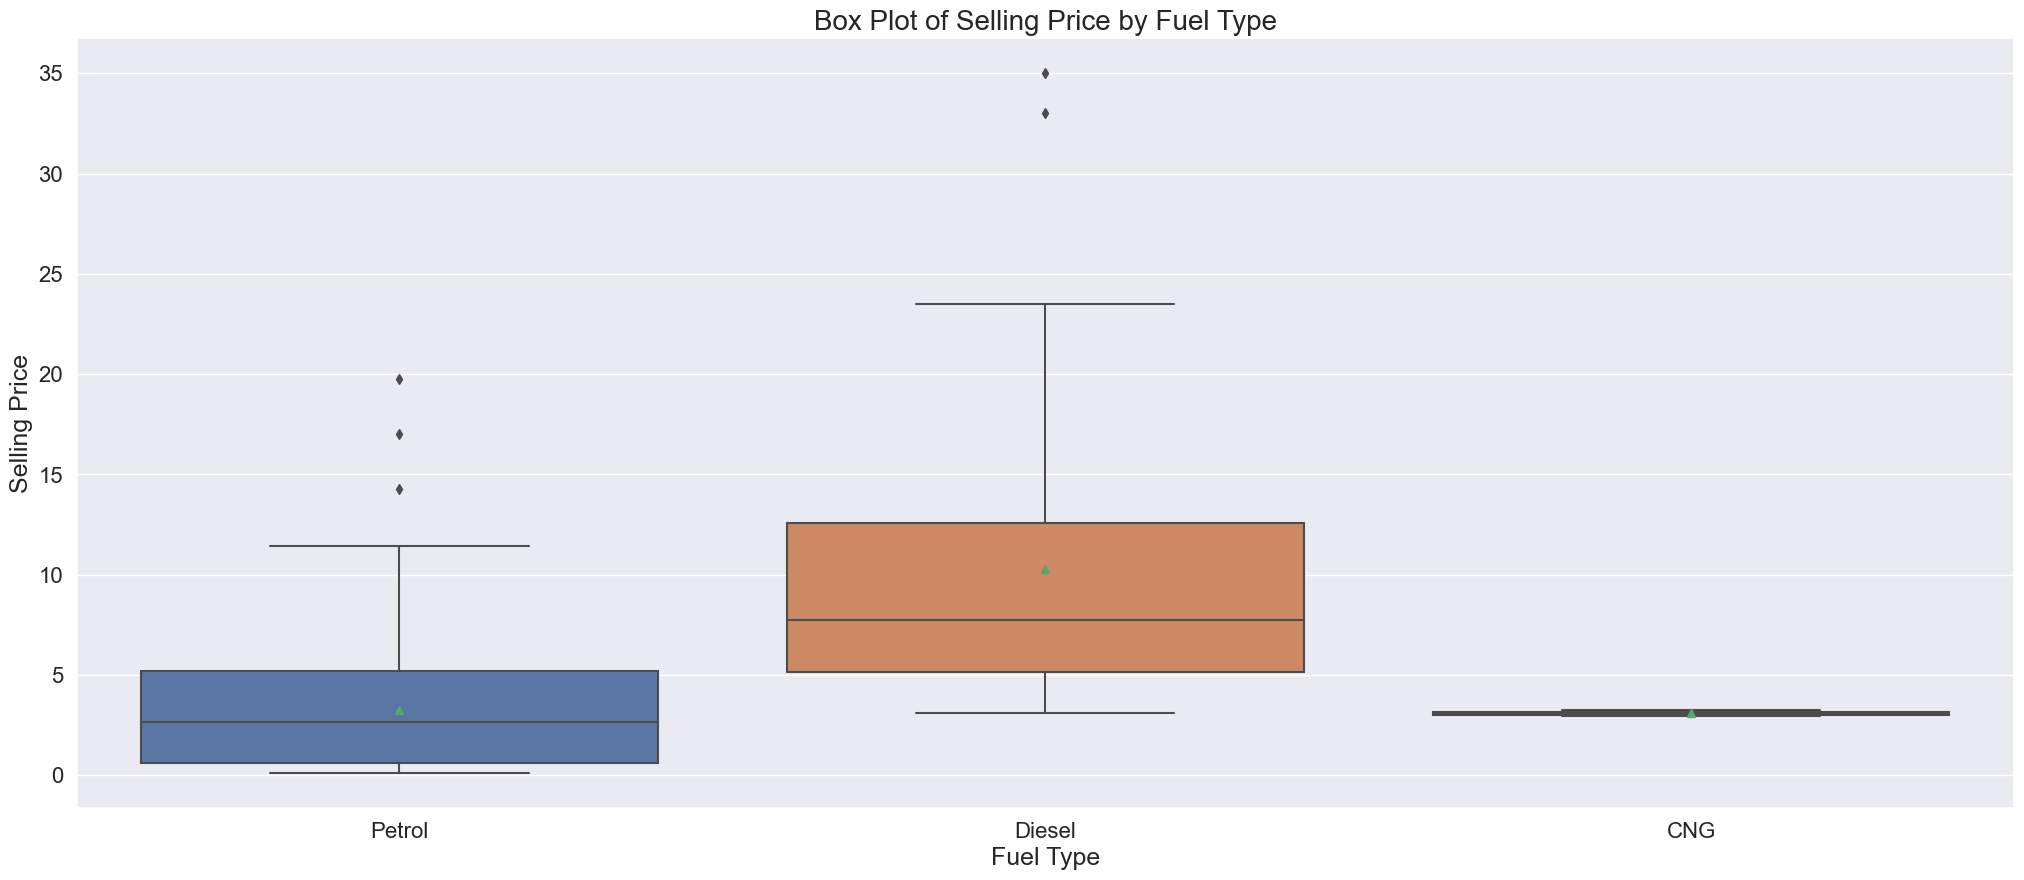

In [351]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, showmeans=True)
plt.xlabel('Fuel Type', fontsize=18)
plt.ylabel('Selling Price', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Box Plot of Selling Price by Fuel Type', fontsize=20)

plt.show()


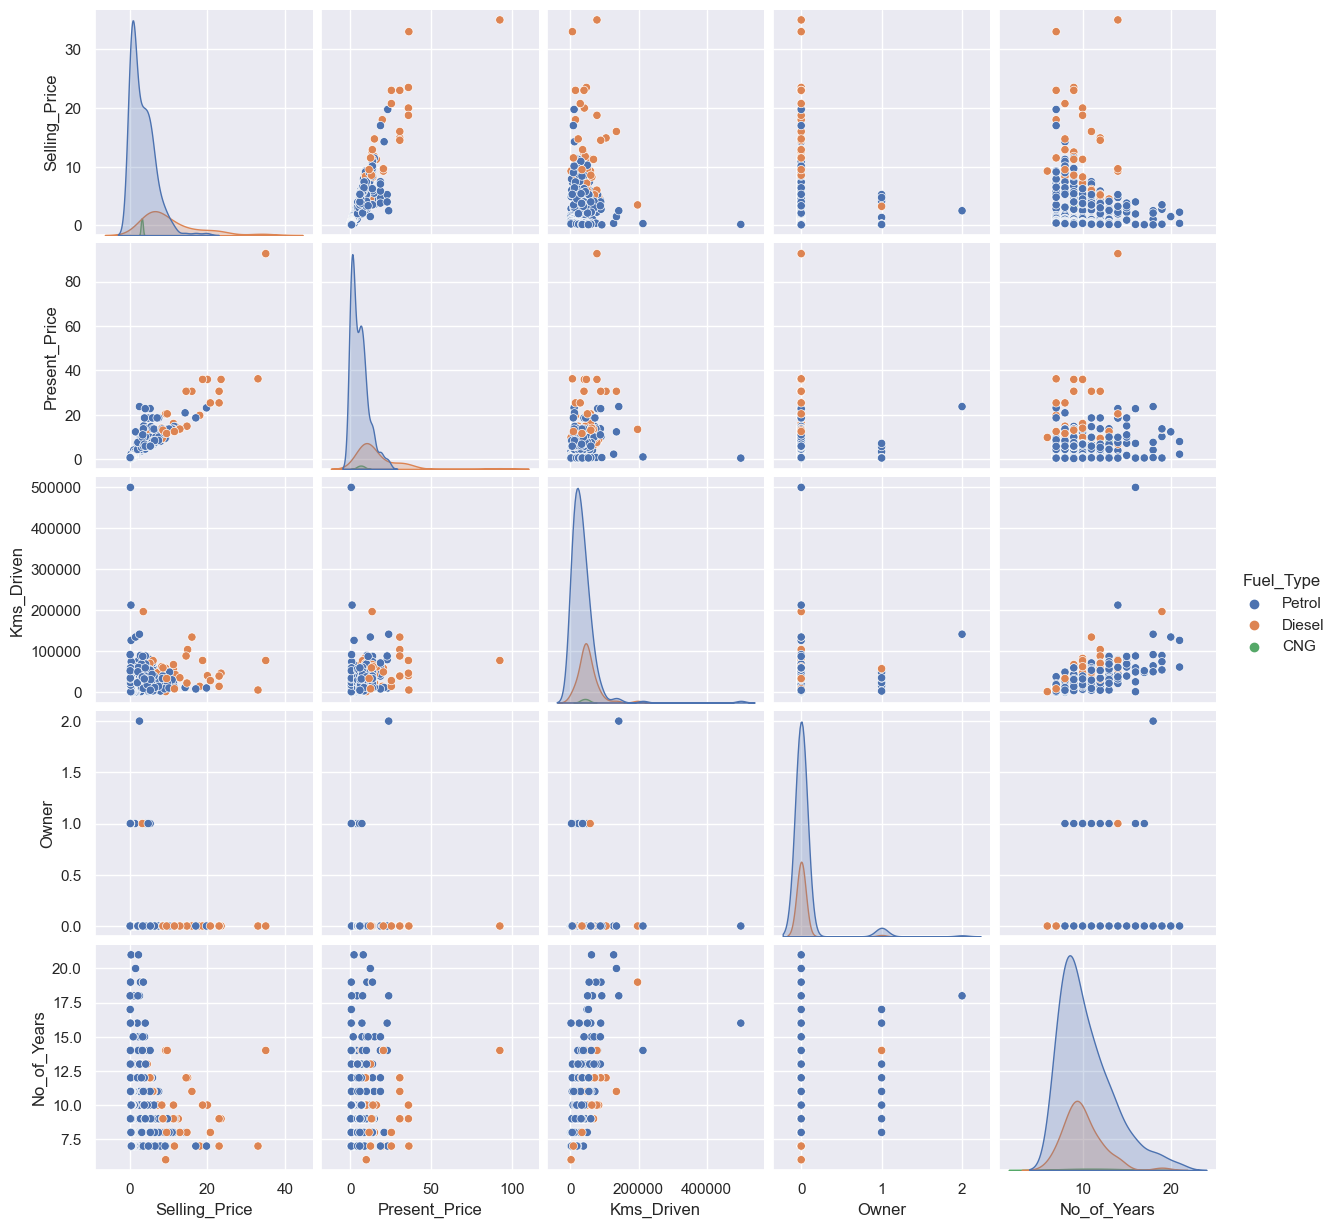

In [352]:
sns.pairplot(data= final_df, hue= 'Fuel_Type', diag_kind= 'kde')

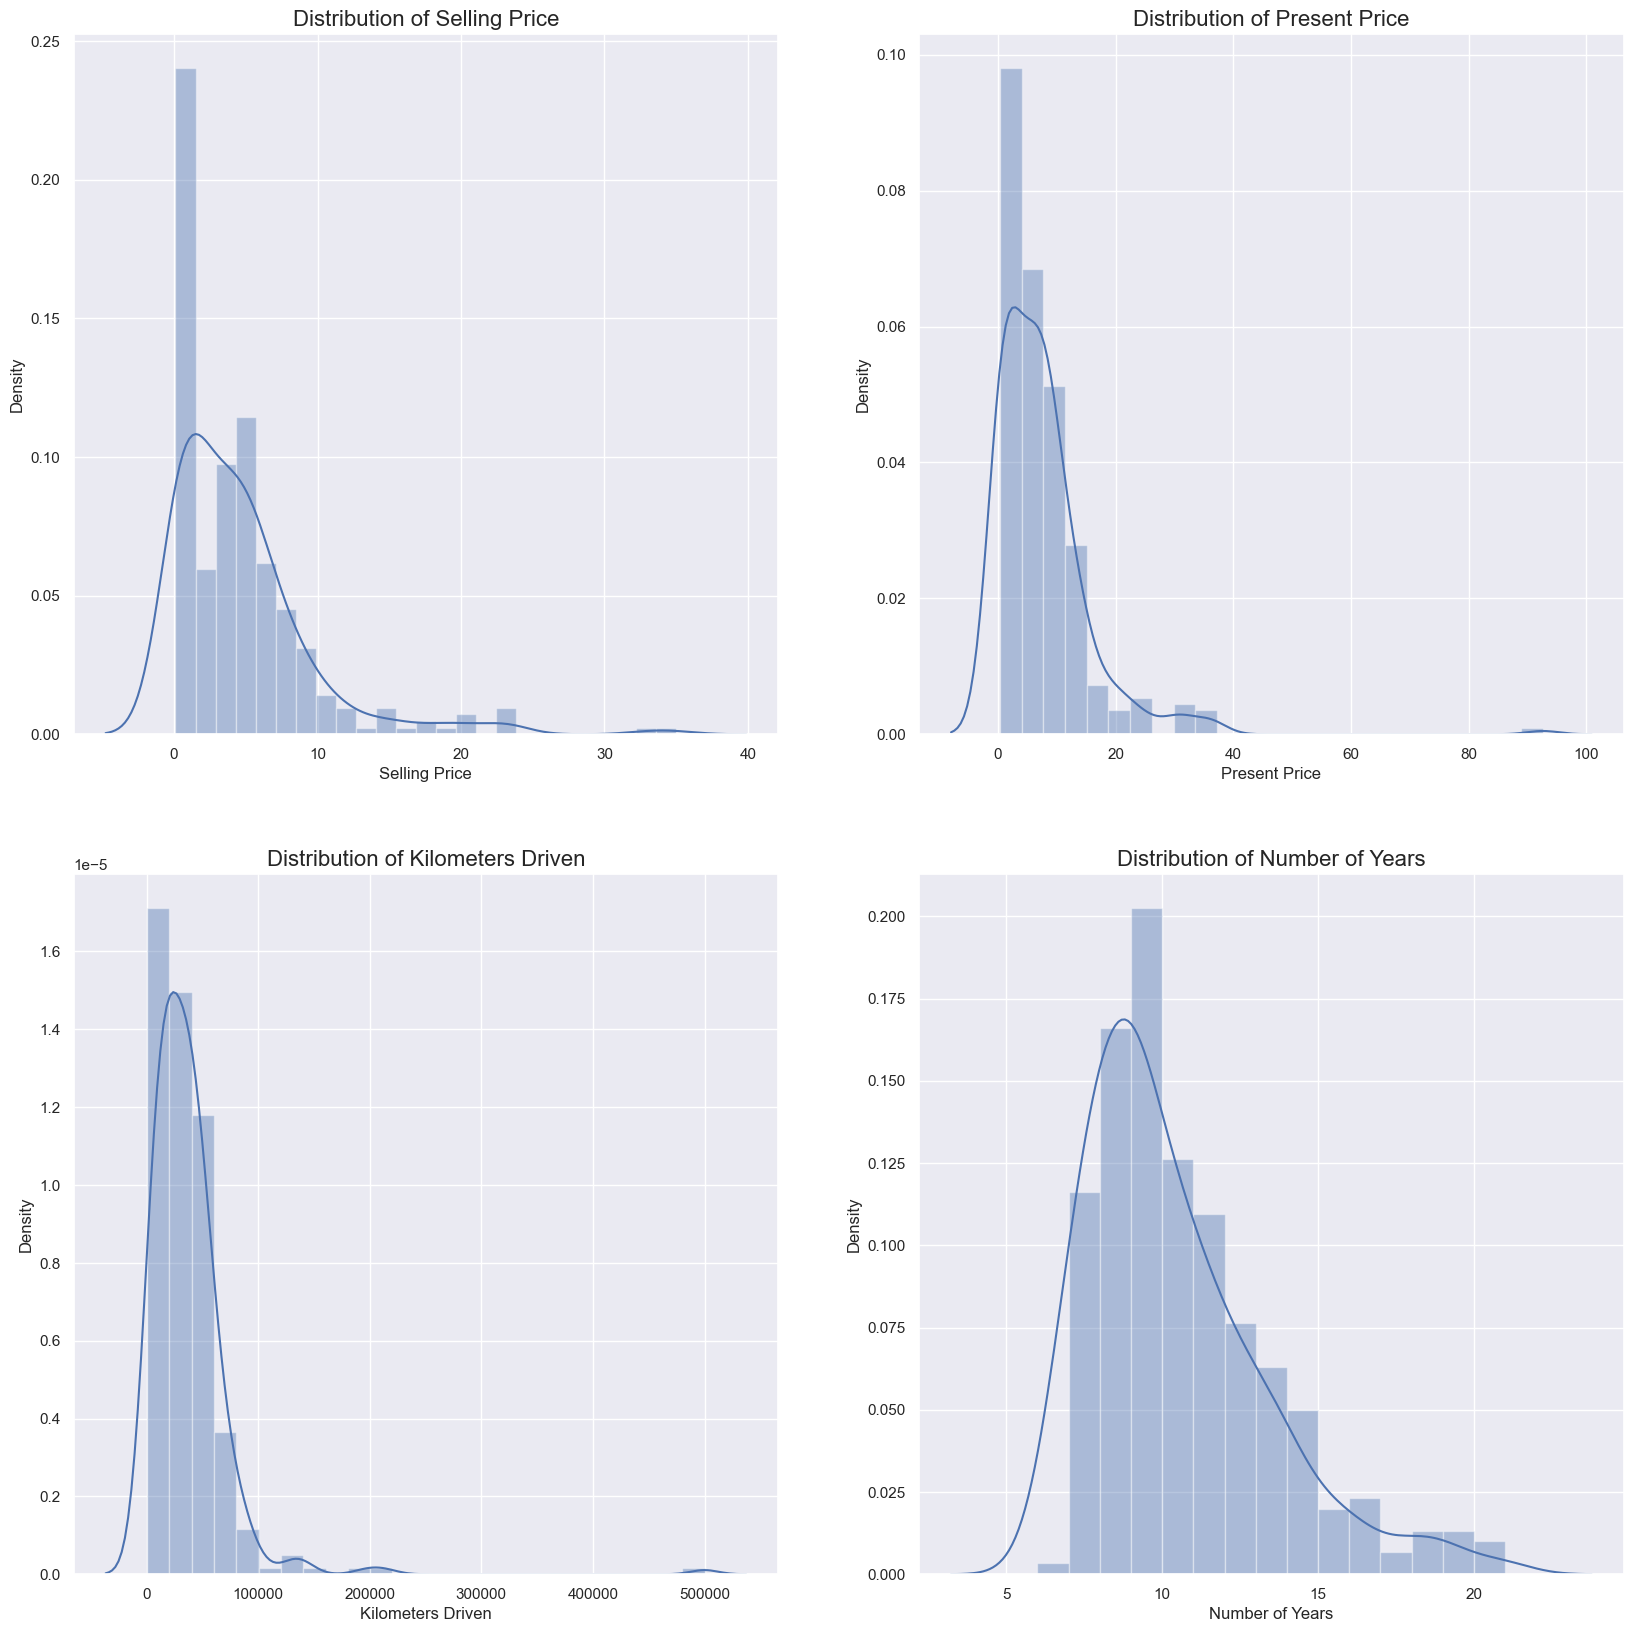

In [353]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distplot of 'Selling_Price' feature
k1 = sns.distplot(a = final_df['Selling_Price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Selling Price', fontsize=16)
ax0.set(xlabel= 'Selling Price', ylabel= 'Density')

# Subplot 2: Distplot of 'Present_Price' feature
k2 = sns.distplot(a = final_df['Present_Price'], bins= 25, ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Present Price', fontsize=16)
ax1.set(xlabel= 'Present Price', ylabel= 'Density')

# Subplot 3: Distplot of 'Kms_Driven' feature
k1 = sns.distplot(a = final_df['Kms_Driven'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

# Subplot 4: Distplot of 'No_of_Years' feature
k1 = sns.distplot(a = final_df['No_of_Years'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Number of Years', fontsize=16)
ax3.set(xlabel= 'Number of Years', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")

In [354]:
print("'No_of_Years' variable have {} unique category : {}".format(final_df['No_of_Years'].nunique(), 
                                                                   final_df['No_of_Years'].unique()))

'No_of_Years' variable have 16 unique category : [10 11  7 13  6  9  8 15 14 12 21 16 18 19 20 17]


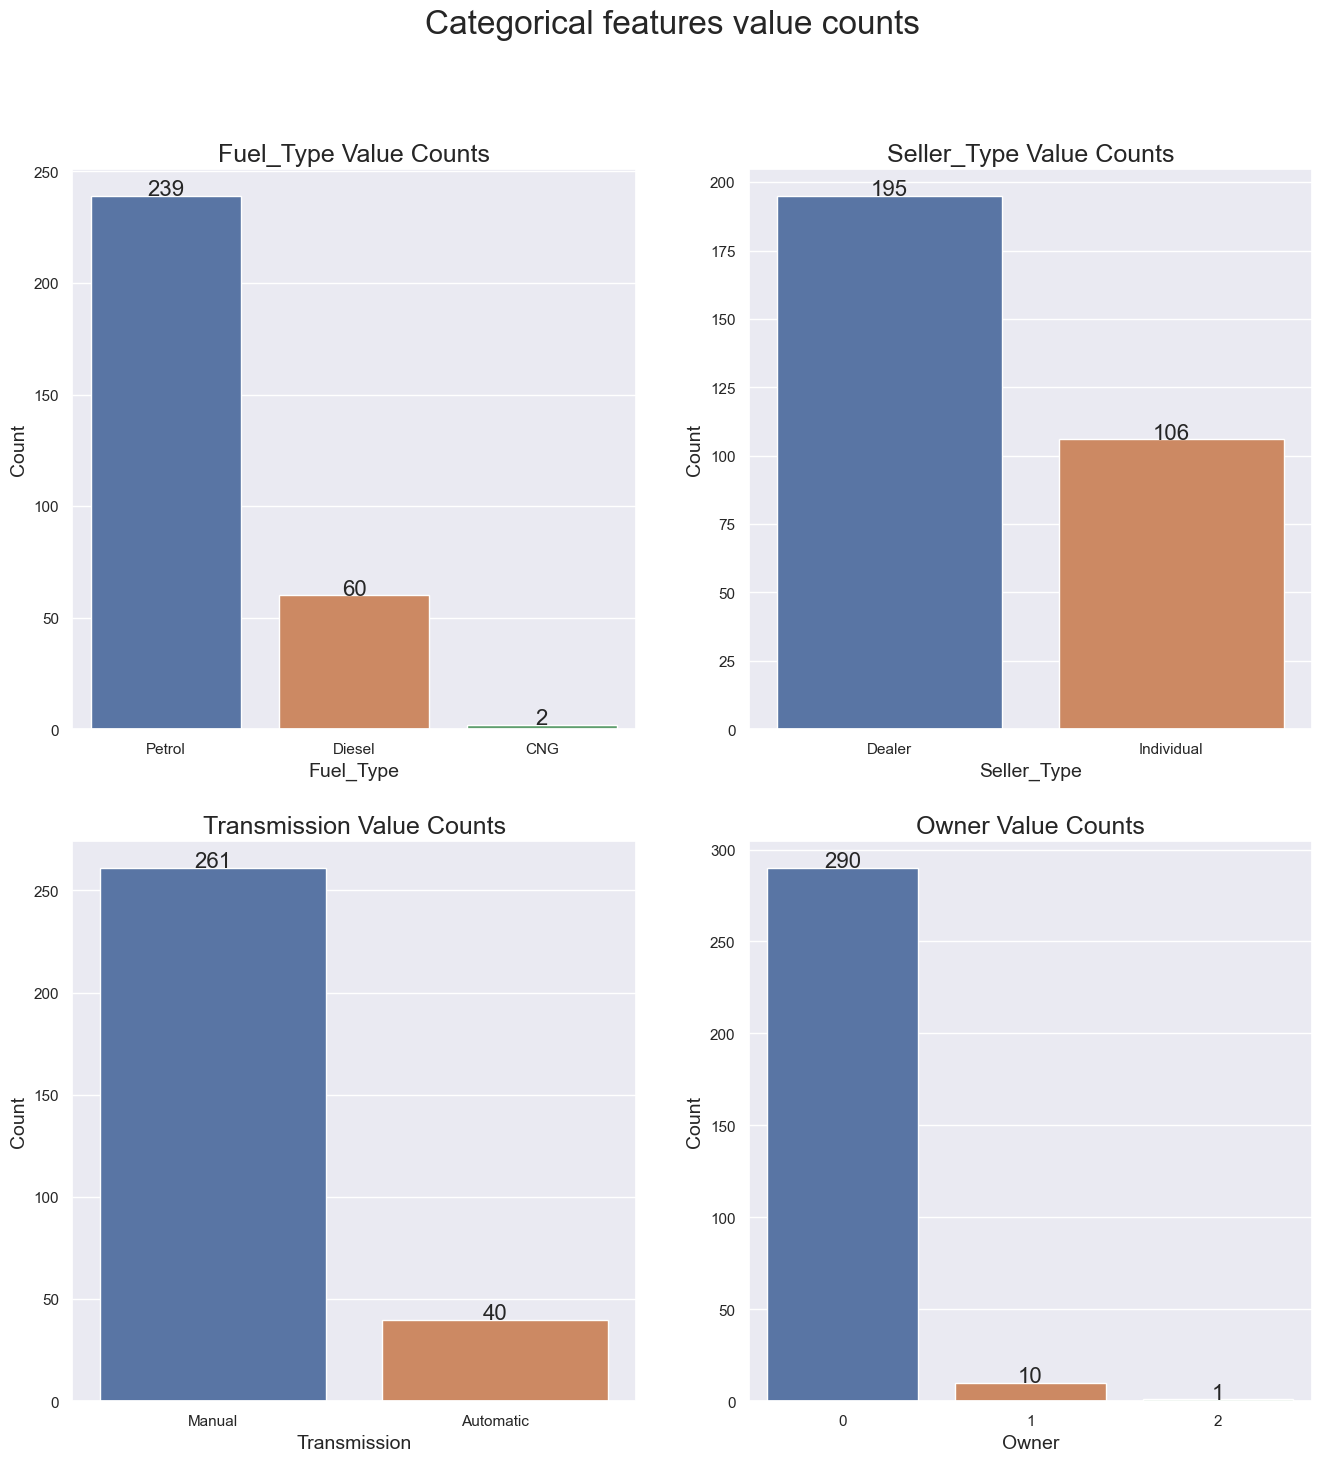

In [355]:
cat_col = list(final_df.columns[3:7])

fig = plt.figure(figsize= (16,16))
plt.suptitle('Categorical features value counts', fontsize = 24)
k=0
for i in range(1,5):
    ax = fig.add_subplot(2,2,i) 
    cat_order = final_df[cat_col[k]].value_counts()
    sns.countplot(data = final_df, x = cat_col[k], order = cat_order.index, ax= ax) 
    plt.xlabel(cat_col[k], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('{} Value Counts'.format(cat_col[k]), fontsize=18)
    
    for j in range(cat_order.shape[0]):
        count = cat_order[j]
        strt='{}'.format(count)
        plt.text(j,count+0.1,strt,ha='center', fontsize=16)
    k=k+1

Text(0.5, 1.0, 'Number of Years Value Counts')

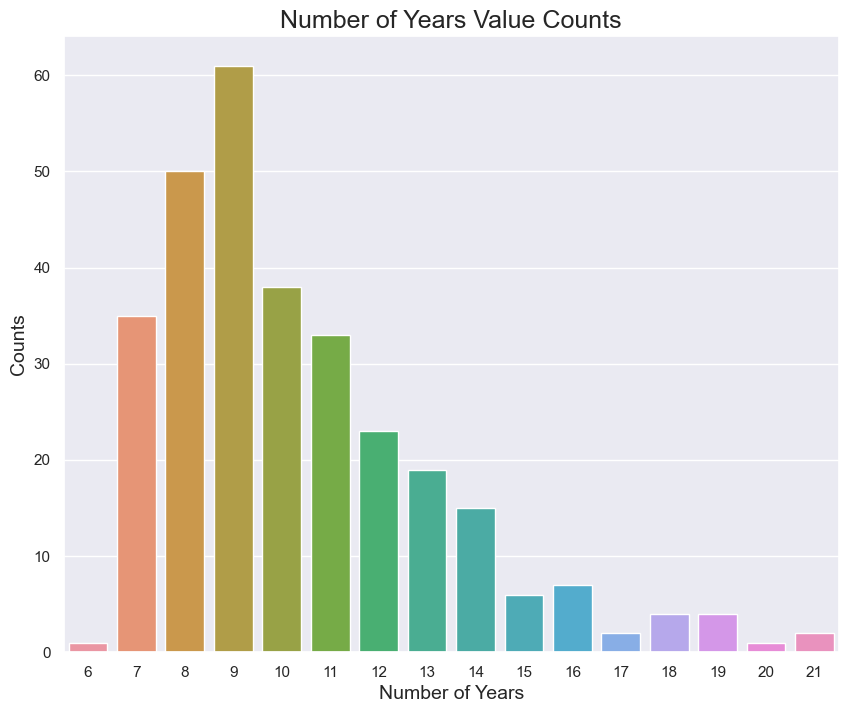

In [356]:
plt.figure(figsize=(10,8))
sns.countplot(data= final_df, x= 'No_of_Years')
plt.xlabel('Number of Years', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number of Years Value Counts', fontsize=18)

### Convert Categorical variable into numerical


In [357]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 1, 'Diesel': 0, 'CNG': 2})
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,2014,3.35,5.59,27000,1,Dealer,Manual,0,2024,10
1,sx4,2013,4.75,9.54,43000,0,Dealer,Manual,0,2024,11
2,ciaz,2017,7.25,9.85,6900,1,Dealer,Manual,0,2024,7
3,wagon r,2011,2.85,4.15,5200,1,Dealer,Manual,0,2024,13
4,swift,2014,4.60,6.87,42450,0,Dealer,Manual,0,2024,10


In [358]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


<Axes: >

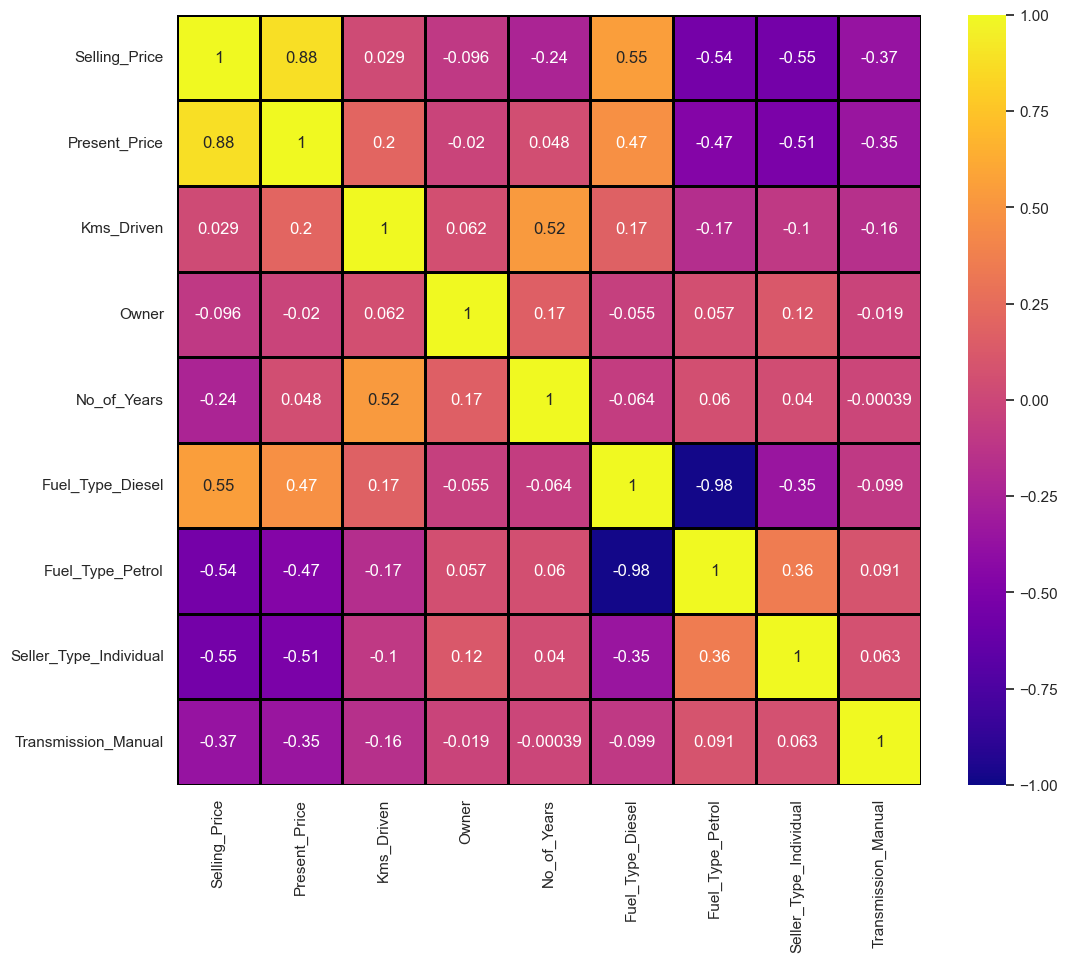

In [385]:
plt.figure(figsize=(12,10))
sns.heatmap(data = final_df.corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='black', linewidths=2)

In [360]:
# Let's check data types of variables
final_df.dtypes

Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
No_of_Years                 int64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Seller_Type_Individual      uint8
Transmission_Manual         uint8
dtype: object

In [361]:
# Converting the datatypes of variables as of required datatype
final_df['Fuel_Type_Diesel'] = final_df['Fuel_Type_Diesel'].astype('int64')
final_df['Fuel_Type_Petrol'] = final_df['Fuel_Type_Petrol'].astype('int64')
final_df['Seller_Type_Individual'] = final_df['Seller_Type_Individual'].astype('int64')
final_df['Transmission_Manual'] = final_df['Transmission_Manual'].astype('int64')
final_df.dtypes

Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
No_of_Years                 int64
Fuel_Type_Diesel            int64
Fuel_Type_Petrol            int64
Seller_Type_Individual      int64
Transmission_Manual         int64
dtype: object

In [362]:
X = final_df.iloc[:, 1:]            # Feature matrix (independent variables)
y = final_df.iloc[:, 0]             # Target variable (dependent variable)

In [382]:
# To check important feature
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

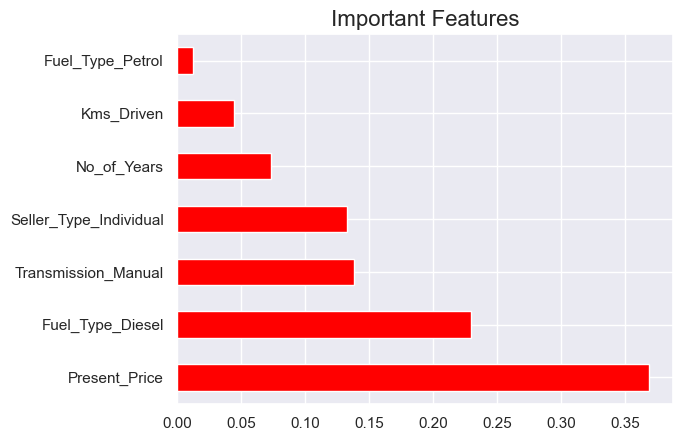

In [384]:
#plot graph of feature importances for better visualization

imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

<h2>Model Building</h2><a id="5"></a>

In [365]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [366]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))
    

In [367]:
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()

,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score / Accuracy
Models,,,,
Linear Regression,4.723422,2.173344,0.821530,0.818716
Support Vector Rregression,26.853778,5.182063,0.016409,-0.030640
Decision Tree Regressor,8.047618,2.836832,0.697690,0.691135
Random Forest Regressor,5.316001,2.305645,0.797619,0.795973
Ridge,4.816279,2.194602,0.818029,0.815153


Text(0, 0.5, 'Predicted')

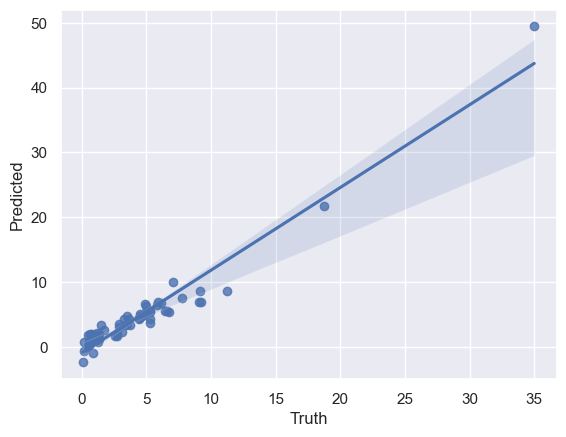

In [368]:
#Visualisation using Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_lr_pred=lr.predict(X_test)
sns.regplot(x=y_test,y=y_lr_pred)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

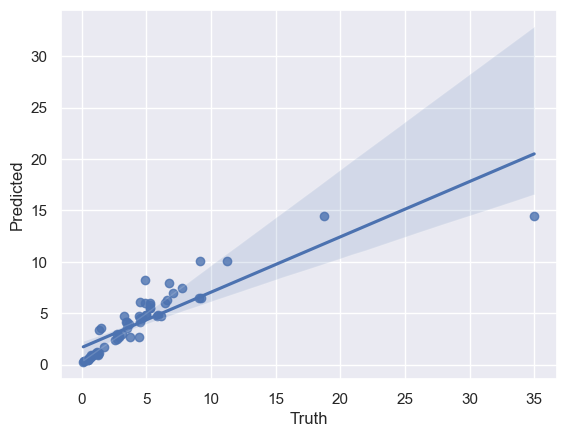

In [369]:
#Visualisation using DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_dtr_pred=dtr.predict(X_test)
sns.regplot(x=y_test,y=y_dtr_pred)
plt.xlabel('Truth')
plt.ylabel('Predicted')


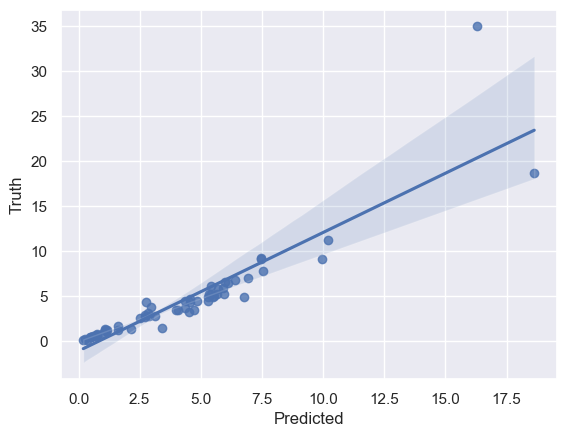

In [370]:
#Visualisation using RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=20)
rfr.fit(X_train, y_train)
y_rfr_pred = rfr.predict(X_test)
sns.regplot(x=y_rfr_pred, y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [371]:
regressor = RandomForestRegressor()

## Hyperparameters 
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [372]:
# Create the random grid
random_grid= {'n_estimators': n_estimators, 
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [373]:
regressor_random = RandomizedSearchCV(estimator=  regressor, param_distributions=  random_grid, scoring= 'neg_mean_squared_error', \
                                      n_iter = 10, cv=5, verbose = 2, random_state=42, n_jobs=1)
regressor_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [374]:
y_predictions = regressor_random.predict(X_test)
y_predictions

array([ 0.53198,  0.8147 ,  1.4498 ,  4.96891,  2.7768 ,  3.15185,
        3.29196,  3.58159,  5.3808 ,  0.41161,  0.54118,  6.22194,
        4.26942,  4.4355 ,  4.23572,  2.30166,  1.12339,  4.05601,
        0.77061,  0.54989,  5.79629,  2.60324,  0.36572,  1.31662,
        8.99269,  2.28681,  0.85062,  4.98712,  4.66293,  6.70395,
       18.76156,  6.38853,  4.53414,  3.31638,  3.86196,  5.14465,
        5.15546,  5.82369,  5.00318,  8.06242,  5.0845 ,  9.38495,
        4.11329,  6.71405,  0.21102,  7.6446 ,  0.60594,  6.87615,
        5.18449, 13.05508,  5.55012,  0.7205 ,  0.97141,  1.21466,
        1.0323 ,  1.00011,  4.107  ,  5.33255,  5.6005 ,  0.7907 ,
        6.71124])

### Predicting Test Data by visualizing
*Now that I've fit and trained the model, I need to evaluate its performance by predicting the test values and visualize the results.*

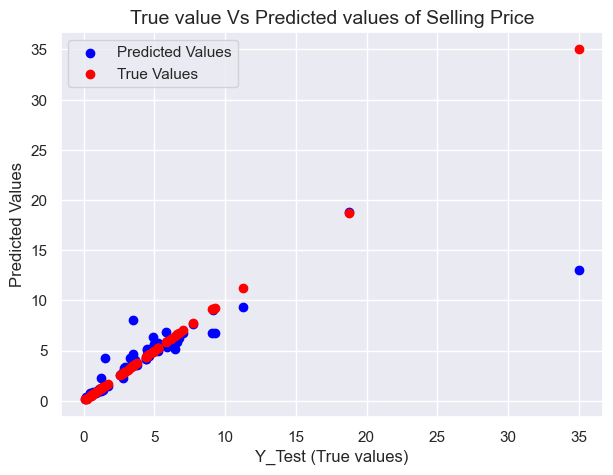

In [380]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_predictions, color='blue', label='Predicted Values')
plt.scatter(y_test, y_test, color='red', label='True Values') 

plt.xlabel('Y_Test (True values)', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('True value Vs Predicted values of Selling Price', fontsize=14)
plt.legend()  # Show legend for differentiating between true and predicted values
plt.show()


### Residuals



<Axes: xlabel='Selling_Price', ylabel='Density'>

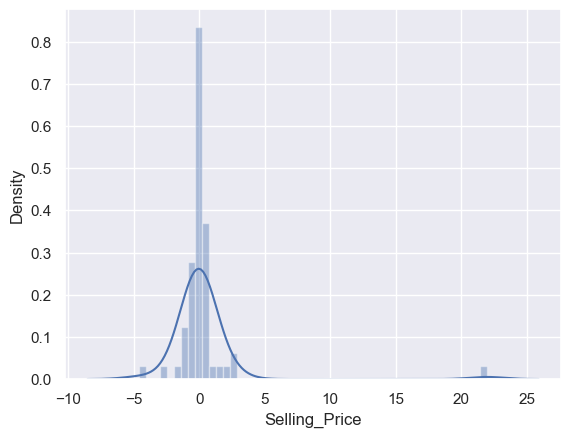

In [376]:
sns.distplot(y_test - y_predictions)

<h2>Model Evaluation</h2><a id="6"></a>

In [330]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predictions))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_predictions))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('\nExplaned Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_predictions))

Mean Absolute Error:  0.8031193442622928
Mean Squareed Error:  8.442317848537723
Root Mean Square Error:  2.905566700066912

Explaned Variance Score:  0.725438973142163
